In [49]:
import json
import pandas as pd
from math import sin, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


replace = {
    'm_fwd': 'Alpha Forward',
    'm_rev': 'Alpha Reverse',
    'm_swr': 'Alpha SWR',
    'm_freq': 'Alpha Frequency',
    'm_temp': 'Alpha Temperature',
    't_fwd': 'MC-200 Forward',
    't_rev': 'MC-200 Reverse',
    't_swr': 'MC-200 SWR',
}


def load_file(*files: str):
    data = {}
    for filename in files:
        with open(filename) as f:
            for line in f.readlines():
                if line.startswith('//'):
                    continue

                d = json.loads(line)

                # drop all the metadata and the raw sample values
                record = {
                    **d['location'],
                    # **d['data'],
                }

                for k, v in replace.items():
                    record[v] = d['data'][k]

                location = d['location']
                key = f"{location['ant']}:{location['freq']}:{location['power']}"
                data[key] = record

    df = pd.DataFrame.from_records(list(data.values()))

    return df


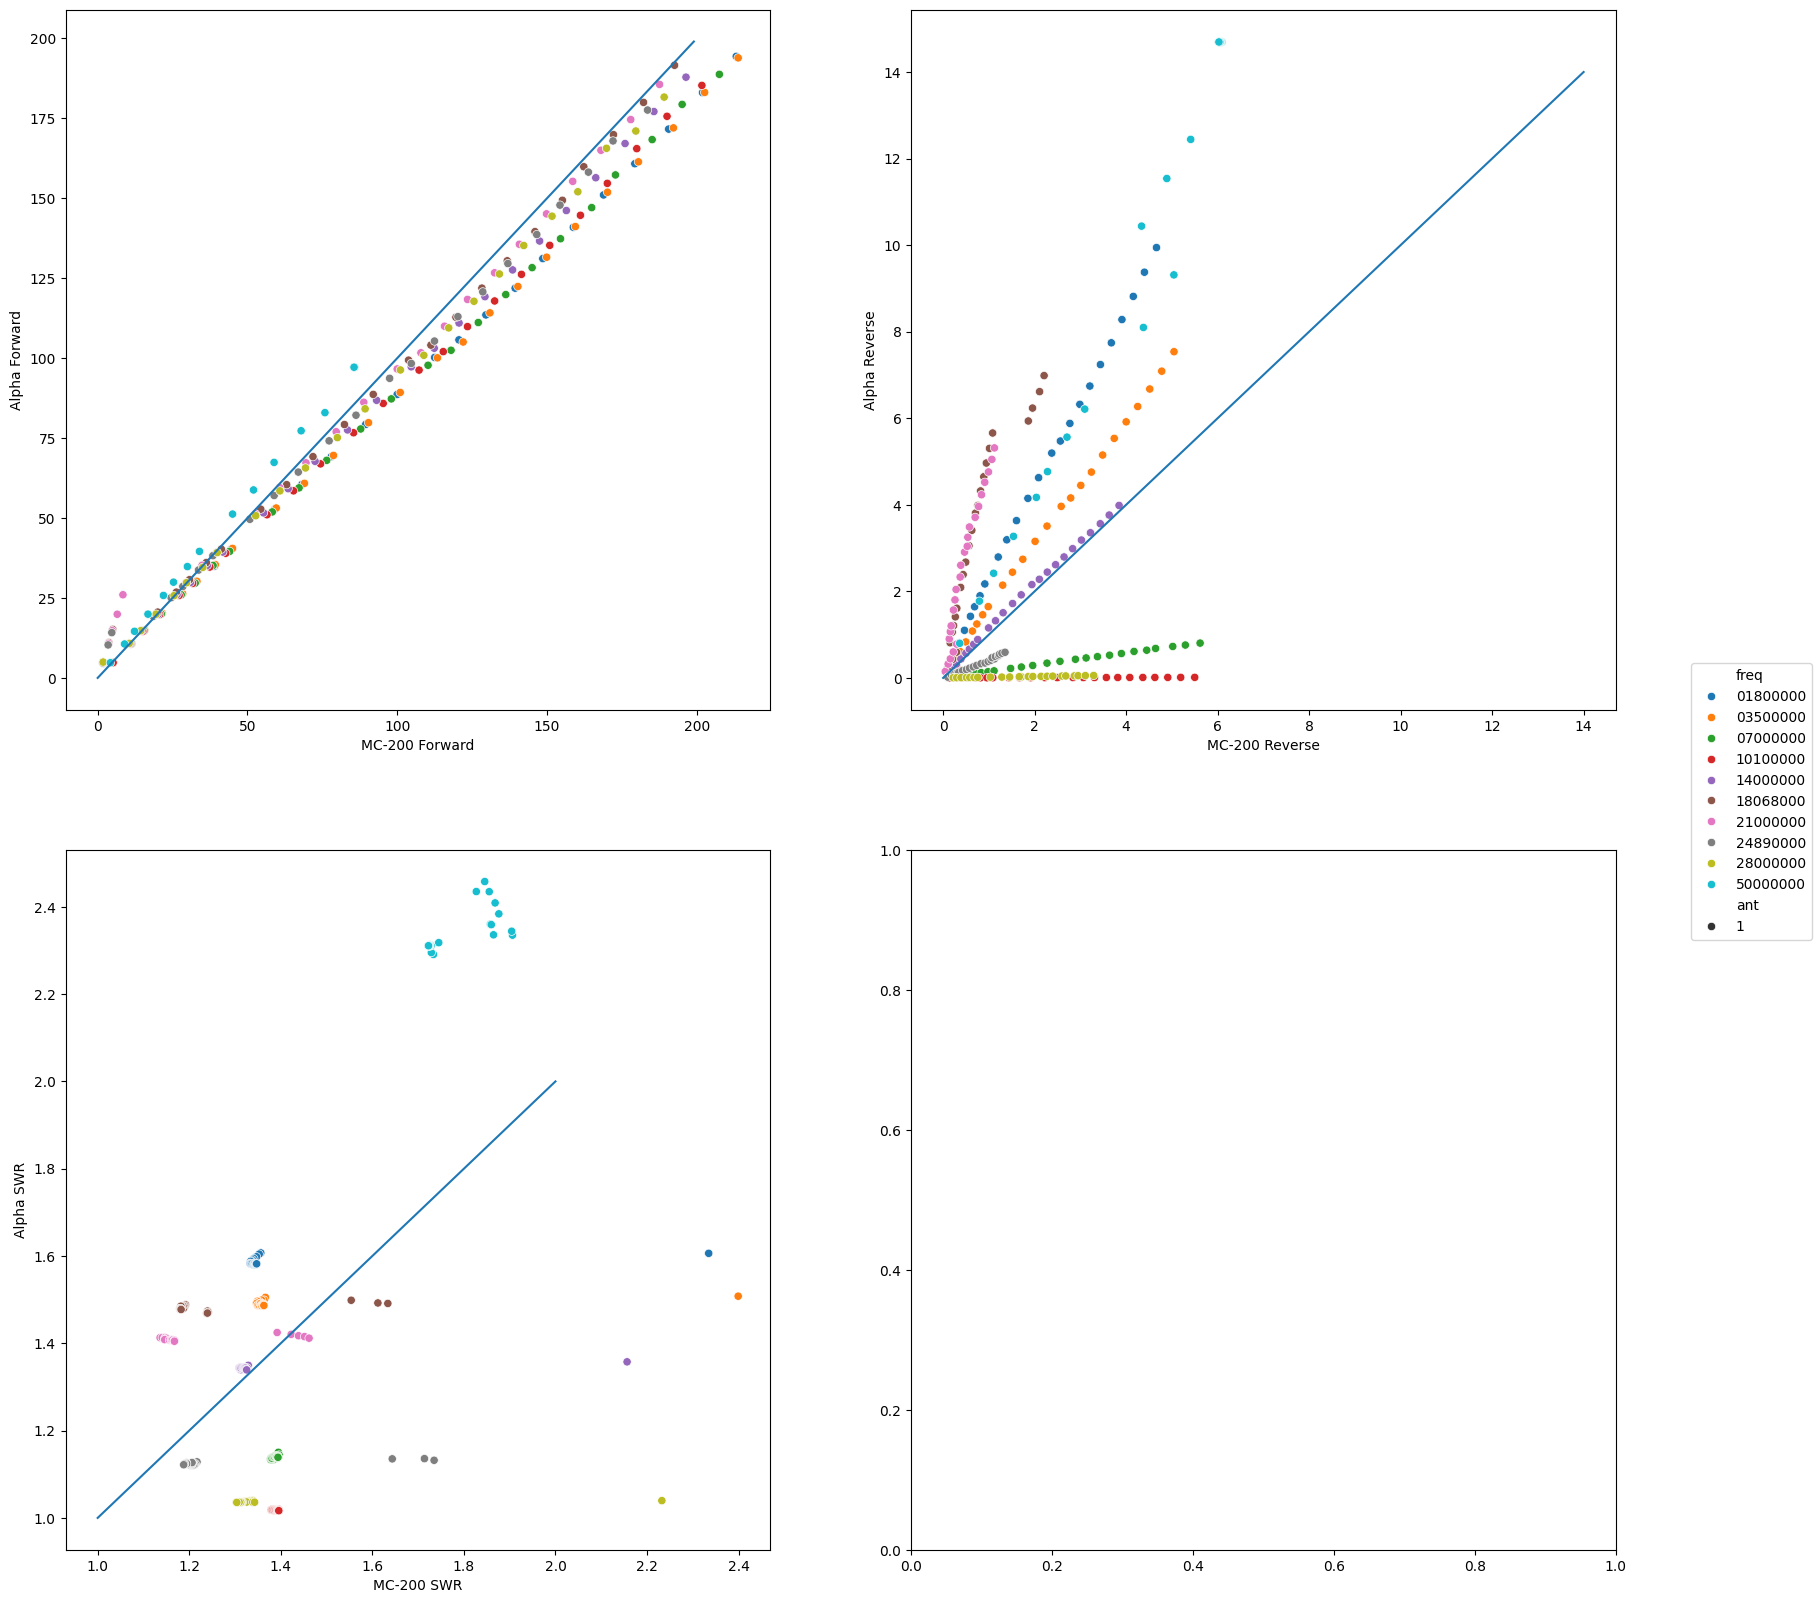

In [53]:
df = load_file('data.jsonl')

df = df.query('ant == 1')

fig, ax = plt.subplots(2, 2, figsize=(20, 20))


def make_line(a, *r):
    line = pd.DataFrame.from_records([{'x': i, 'y': i} for i in range(*r)])
    sns.lineplot(line, x='x', y='y', ax=a)


sns.scatterplot(df, x='MC-200 Forward', y='Alpha Forward', hue='freq', style='ant', ax=ax[0, 0])
make_line(ax[0, 0], 200)

sns.scatterplot(df, x='MC-200 Reverse', y='Alpha Reverse', hue='freq', style='ant', ax=ax[0, 1])
make_line(ax[0, 1], 15)

sns.scatterplot(df, x='MC-200 SWR', y='Alpha SWR', hue='freq', style='ant', ax=ax[1, 0])
make_line(ax[1, 0], 1, 3)

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[1, 0].get_legend().remove()
